    INFO : 2020-05-21 06:29:15,236 : start: simulate
    INFO : 2020-05-21 06:29:15,448 :   index: 0.00%
    INFO : 2020-05-21 06:29:15,969 :   index: 2.99%
    INFO : 2020-05-21 06:29:16,502 :   index: 5.98%
    INFO : 2020-05-21 06:29:17,038 :   index: 8.98%
    INFO : 2020-05-21 06:29:17,553 :   index: 11.97%
    INFO : 2020-05-21 06:29:18,059 :   index: 14.96%
    INFO : 2020-05-21 06:29:18,640 :   index: 17.95%
    INFO : 2020-05-21 06:29:19,165 :   index: 20.95%
    INFO : 2020-05-21 06:29:19,667 :   index: 23.94%
    INFO : 2020-05-21 06:29:20,183 :   index: 26.93%
    INFO : 2020-05-21 06:29:20,783 :   index: 29.92%
    INFO : 2020-05-21 06:29:21,309 :   index: 32.91%
    INFO : 2020-05-21 06:29:21,815 :   index: 35.91%
    INFO : 2020-05-21 06:29:22,355 :   index: 38.90%
    INFO : 2020-05-21 06:29:22,861 :   index: 41.89%
    INFO : 2020-05-21 06:29:23,382 :   index: 44.88%
    INFO : 2020-05-21 06:29:24,088 :   index: 47.88%
    INFO : 2020-05-21 06:29:24,619 :   index: 50.8

427669.34620037675


/Users/shuheikatori/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


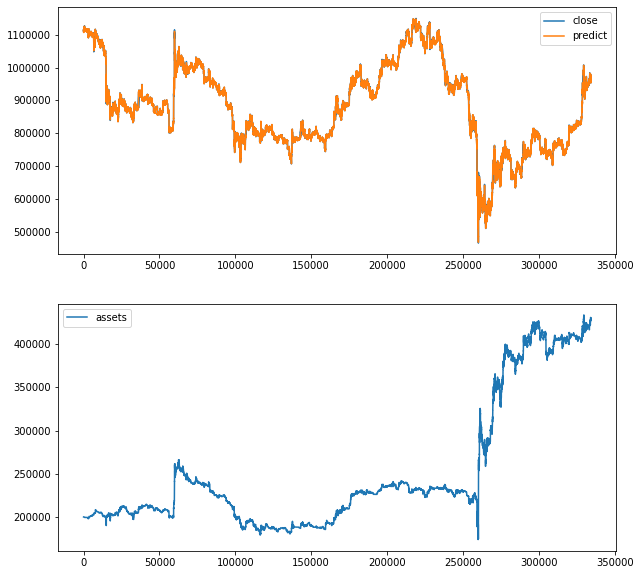

In [1]:
import pickle
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from mylib import bitcoin
from mylib import simulator
%matplotlib inline

def plot(x, y_close, y_pred, y_assets):
    _, (ax1, ax3) = plt.subplots(2, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_close, label='close')
    ax1.plot(list(range(len(x))), y_pred, label='predict')
    ax1.legend()
    ax3.plot(list(range(len(x))), y_assets, label='assets')
    ax3.legend()
    plt.show()

def main():
    file_name = "v0.0.12-test"
    csv = pd.read_csv("datasets/" + file_name + ".csv")

    with open("models/" + file_name + ".pickle", mode="rb") as file:
        model = pickle.load(file)

    test_start = int(len(csv) * 0.8)  # 最後20%のデータでテスト
    data = csv[test_start:]

    s = simulator.BitcoinSimulator(200000)
    
    x = data
    x.reset_index(drop=True, inplace=True)
    y_close = list(x["close"])
    # y_result = list(x["extreme60"])
    p = model.predict(x[bitcoin.TRAIN_COLUMNS])
    pred = pd.DataFrame(p)
    pred.columns = ["pred"]
    y_pred = np.exp(pred["pred"] + x["open_log"])  # TODO: Build in simulator.py
    y_assets = list(s.simulate(data, model))
    print(y_assets[-1])
    
    plot(x, y_close, y_pred, y_assets)
    
if __name__ == "__main__":
    main()